### Generate toy imbalanced dataset

In [50]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import matplotlib.pyplot as plt

In [51]:
# define dataset
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0)

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label


Counter({0: 4950, 1: 50})


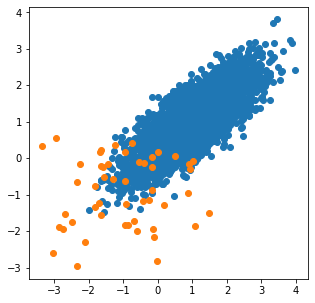

In [52]:

plt.figure(figsize=(5, 5))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show() 

In [61]:
import numpy as np
from models_perso import GammaKnn, SimpleKnn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

knn = SimpleKnn(nb_nn=3)
knn.fit(X_train, y_train,None)
pred = knn.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
knn_F=round(f_measure, 3)

results=[]
beta = 1

gamma_list=np.arange(0, 2.1, 0.1)
for gamma in gamma_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)
    gammaKnn = GammaKnn(nb_nn=3, gamma=gamma)
    gammaKnn.fit(X_train, y_train,None)

    pred = gammaKnn.predict(X_test)
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

    f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
    results.append({"gamma":round(gamma,2),"F":round(f_measure, 3),"TN":TN,"FP":FP,"FN":FN,"TP":TP})

INIT


AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [57]:
import pandas as pd 

DS=pd.DataFrame(results)
print(DS)

    gamma      F   TN   FP  FN  TP
0     0.0  0.024    0  988   0  12
1     0.1  0.183  881  107   0  12
2     0.2  0.379  953   35   1  11
3     0.3  0.419  966   22   3   9
4     0.4  0.500  976   12   4   8
5     0.5  0.593  981    7   4   8
6     0.6  0.696  985    3   4   8
7     0.7  0.727  986    2   4   8
8     0.8  0.762  987    1   4   8
9     0.9  0.700  987    1   5   7
10    1.0  0.632  987    1   6   6
11    1.1  0.632  987    1   6   6
12    1.2  0.588  988    0   7   5
13    1.3  0.588  988    0   7   5
14    1.4  0.500  988    0   8   4
15    1.5  0.500  988    0   8   4
16    1.6  0.500  988    0   8   4
17    1.7  0.500  988    0   8   4
18    1.8  0.500  988    0   8   4
19    1.9  0.500  988    0   8   4
20    2.0  0.400  988    0   9   3


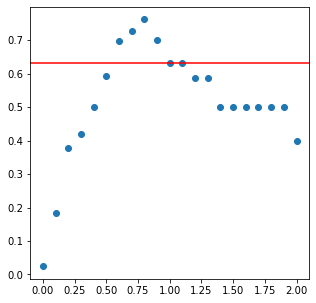

In [58]:
import matplotlib.lines as lines
plt.figure(figsize=(5, 5))
plt.scatter(DS['gamma'], DS['F'])
plt.axhline(y=knn_F, color='r', linestyle='-')

plt.show() 